## En este Notebook ejecutaremos un modelo predictivo usando sólo una variable para ejemplificar. Usaremos Regresión Logística

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

In [22]:
df = pd.read_csv('df_clean_4.csv')

In [23]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


¿Cuál es la proporción de la clase positiva, es decir, de los que no pagaron (default)?

In [24]:
df['default payment next month'].mean()

0.2217971797179718

Los que no pagaron representan el 22.1%. No es un problema particularmente desbalanceado.

He aquí las cantidades:

In [42]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

### Modelo Regresión Logística ( Usaremos sólo LIMIT_BAL como variable predictora)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df['LIMIT_BAL'].values.reshape(-1,1)  # Variable predictora
Y=df['default payment next month'].values # Variable objetivo

Split en conjuntos Train/Test:

In [28]:
X_train, X_test, y_train, y_test = train_test_split\
(X,Y, test_size=0.2,random_state=24)

Entrenamiento del Modelo

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
example_lr = LogisticRegression()  # crea el modelo

In [31]:
example_lr.fit(X_train, y_train)   # ajuste del modelo

LogisticRegression()

### Métricas de desempeño

MATRIZ DE CONFUSIÓN Y ACCURACY:

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_predict=example_lr.predict(X_test)

In [34]:
print(confusion_matrix(y_test,y_predict))

[[4178    0]
 [1155    0]]


In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4178
           1       0.00      0.00      0.00      1155

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.61      0.78      0.69      5333



C:\Users\x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Notemos que aunque la accuracy es del 78%, el modelo no ha predicho acertadamente ninguna de los valores 0 (default). 
Veamos ahora la métrica ROC AUC:

MÉTRICA ROC AUC

Crearemos el array de probabilidades predichas para el test data:

In [36]:
y_test_predict_proba= example_lr.predict_proba(X_test)

In [37]:
y_test_predict_proba

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

Estas son las probabilidades predichas por el método con un umbral de 0.5.

Calcularemos ahora la métrica ROC AUC usando las probabilidades predichas y los valores verdaderos del data test.

In [38]:
from sklearn import metrics

In [39]:
metrics.roc_auc_score(y_test, y_test_predict_proba[:,1])

0.6201990844642832

El modelo tiene un 62% de performance. Esta métrica es más acertada en cuanto a la performance del modelo.

Grafiquemos la Curva ROC:

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

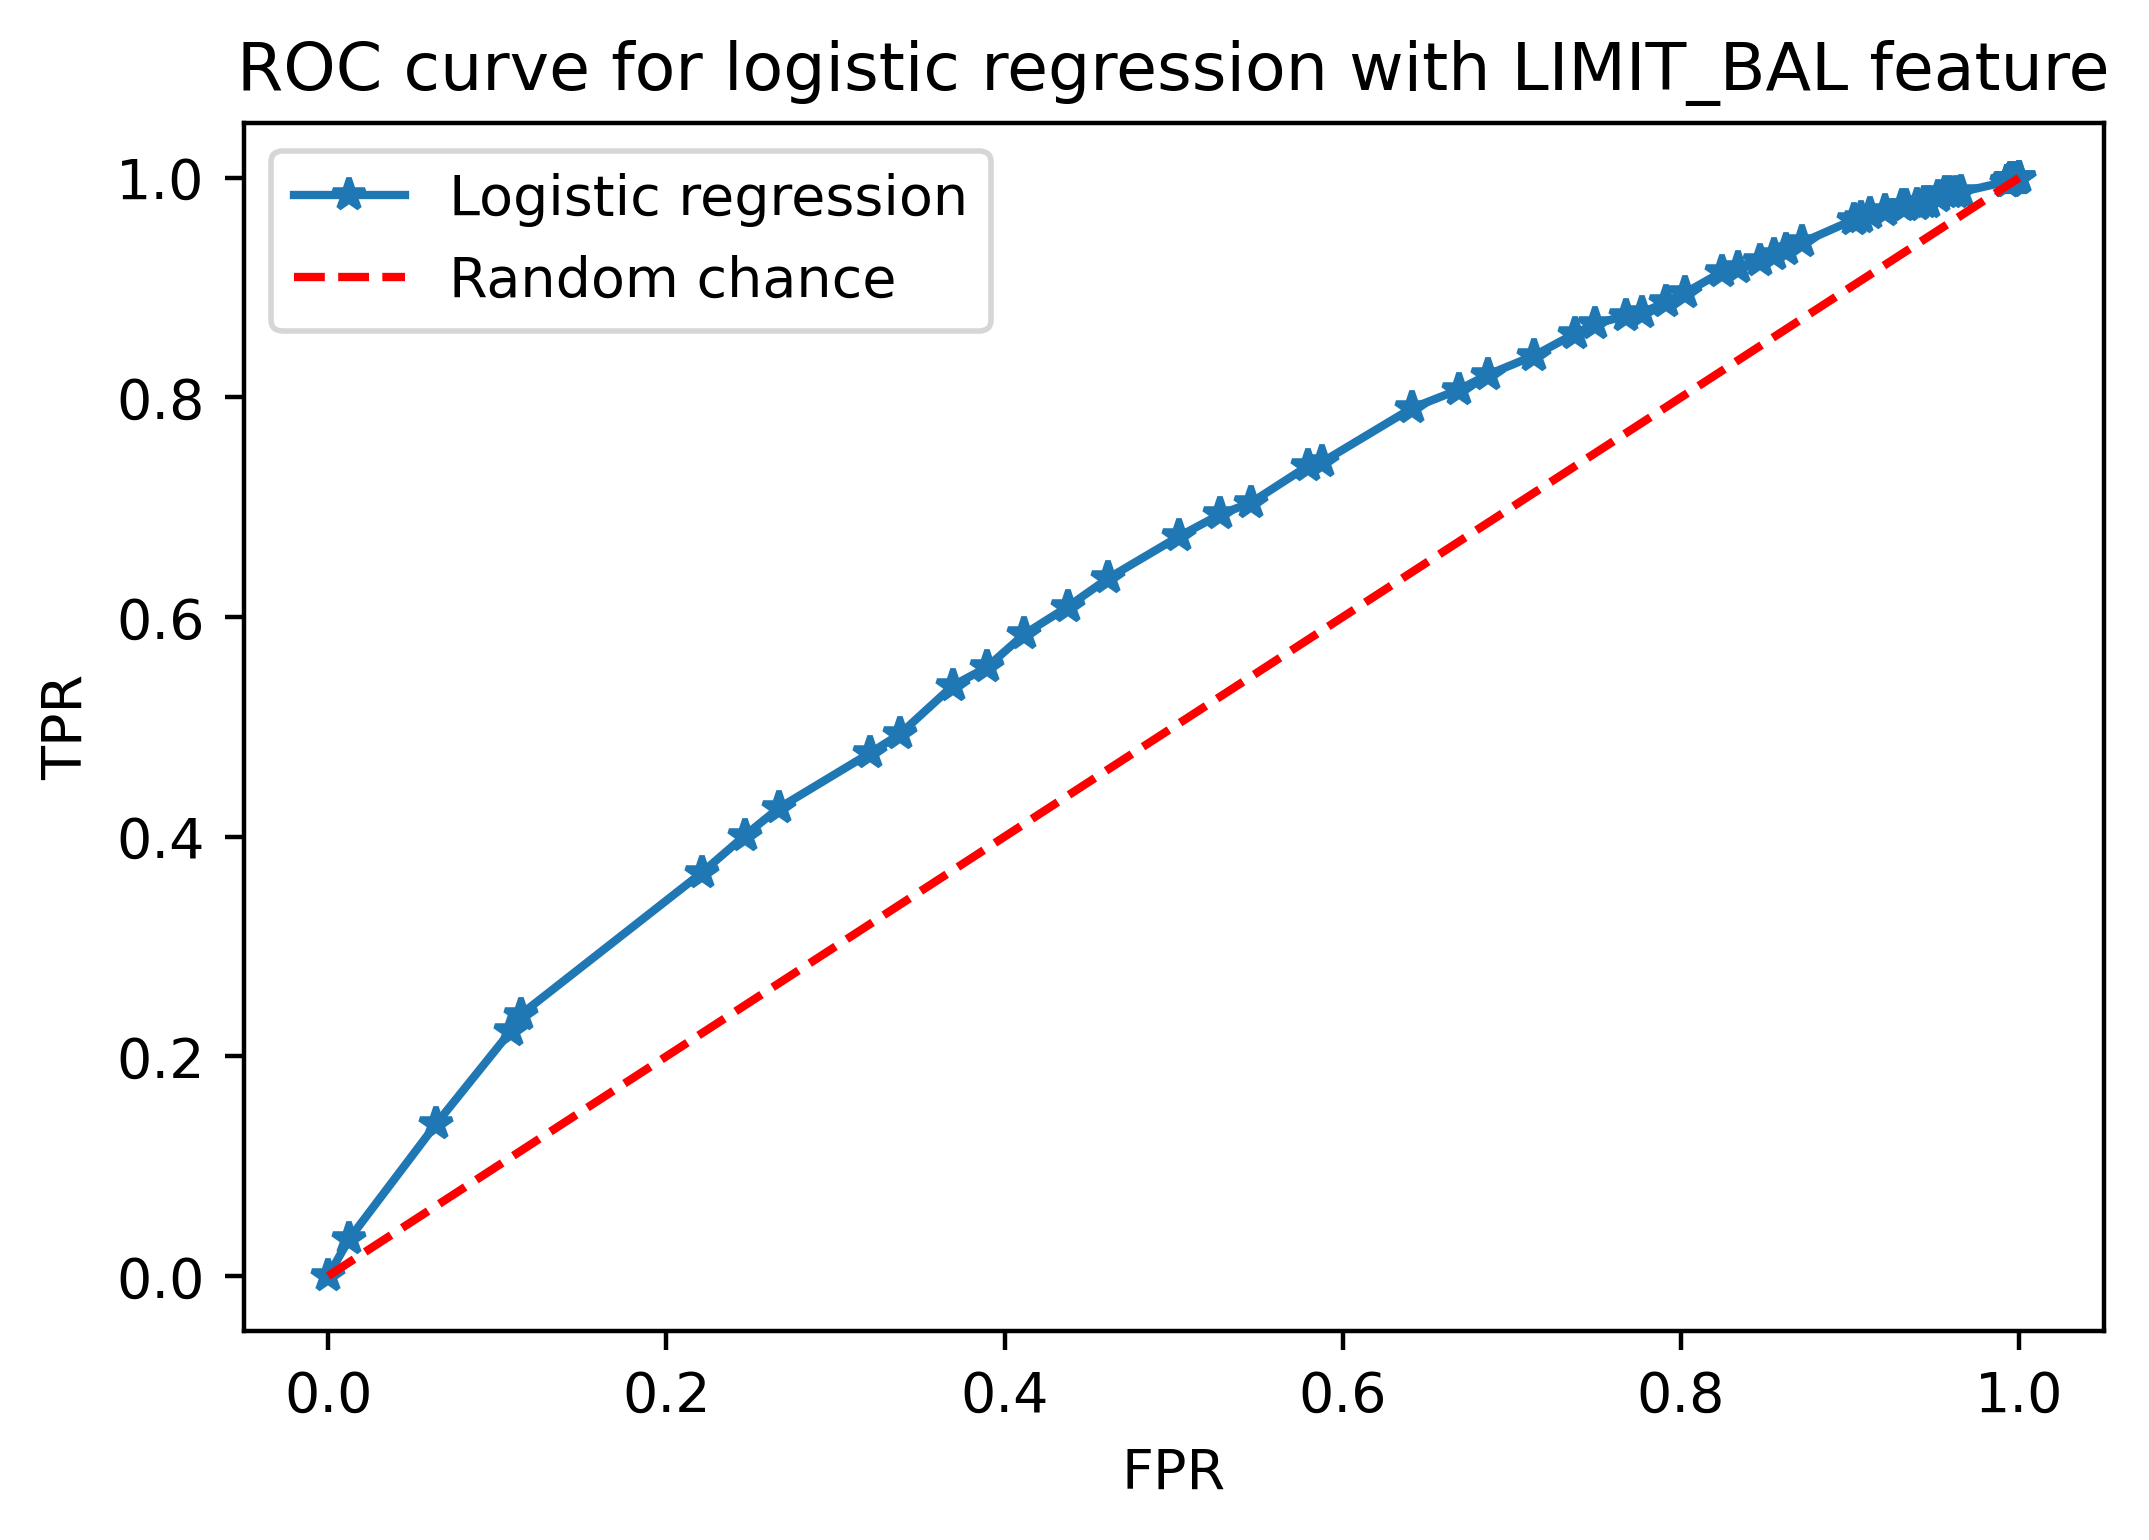

In [40]:
fpr, tpr, thresholds = metrics.roc_curve\
(y_test, \
y_test_predict_proba[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with '\
'LIMIT_BAL feature')